<a href="https://colab.research.google.com/github/jinyoungmoonDEV/Academy_Python_MachineLearning/blob/main/%EB%B9%84%ED%8A%B82205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2C%EB%94%A5%EB%9F%AC%EB%8B%9D_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

KNN을 활용하기 꺼려지는 상황

In [ ]:
path = '/content/Fish.csv'
import pandas as pd
df = pd.read_csv(path)
perch_df = df[df['Species']=='Perch']
perch_df

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [ ]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()
print(perch_length)
print(perch_weight)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


길이를 알고 있을때 무게를 예측해보자

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_length,perch_weight)

In [ ]:
train_input.shape

(42,)

In [ ]:
train_input = train_input.reshape(-1,1)#독립 변수 목록은 2차원 배열 구조로 변경
test_input = test_input.reshape(-1,1)
train_input.shape

(42, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(train_input,train_target)
pval = kn.predict([[50]])
print(pval)

[1000.]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(kn.kneighbors([[50]]))

(array([[6. , 6.5, 7. ]]), array([[16, 33,  8]]))


In [ ]:
from scipy.spatial import distance
distances, indexes = kn.kneighbors([[50]])

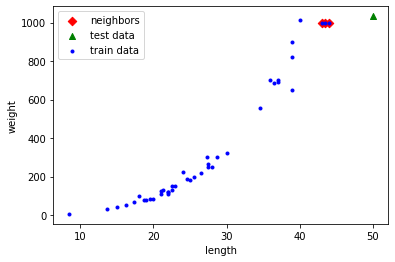

In [ ]:
distances, indexs = kn.kneighbors([[50]])
plt.scatter(train_input[indexes],train_target[indexes],label='neighbors',marker='D',color='r')
plt.scatter(50,1033,label='test data',marker='^',color='g')
plt.scatter(train_input,train_target, label = 'train data',color='b',marker='.')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
pval = kn.predict([[100]])
print(pval)

[1000.]


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)
p_val = lr.predict([[50],[100]])
print(p_val)

[1131.66762711 2844.48942159]


In [ ]:
p_val2 = kn.predict([[50],[100]])
print(p_val2)

[1000. 1000.]


In [ ]:
print("가중치(기울기):",lr.coef_,"편향", lr.intercept_)

가중치(기울기): [34.25643589] 편향 -581.1541673728946


In [ ]:
print(50*lr.coef_+lr.intercept_)
print(p_val[0])

[1131.66762711]
1131.6676271083115


length -> 독립 변수

weight -> 종속 변수

model = neighbors.KNeighborsClassifier(n_neighbors=3) ->분류

기준에서 멀어지면 멀어질수록 정확성이 떨어지는 문제가 발생 -> 선형회귀

선형 회귀 -> 한개이상의 독립변수와 종속변수의 관계를 모델링 -> 선형



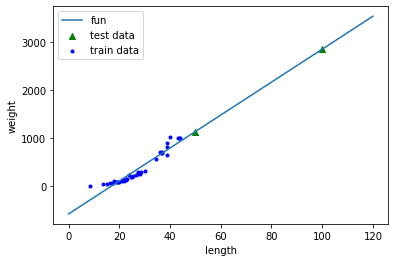

In [ ]:
plt.scatter([50,100],p_val,label='test data',marker='^',color='g')
plt.scatter(train_input,train_target, label = 'train data',color='b',marker='.')
plt.plot([0,120],[0*lr.coef_+lr.intercept_,120*lr.coef_+lr.intercept_],label='fun')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

가상의 데이터를 만들어서 선형 회귀를 해 보자

y=2x+3 에 가까운 데이터

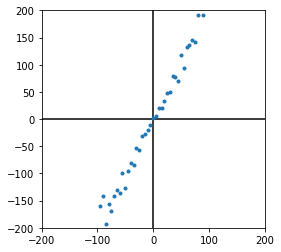

In [ ]:
import numpy as np
plt.figure(figsize=(4,4))
input = [x for x in range(-100,100,5)]
target = [ (2+np.random.uniform(-0.5,0.5))*x+np.random.randint(-3,3) for x in input]
plt.plot(input[:], target,'.')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

In [ ]:
input_data = np.array(input).reshape(-1,1)

In [ ]:
input_data.shape

(40, 1)

In [ ]:
target_data = np.array(target)

In [ ]:
lr = LinearRegression()
lr.fit(input_data,target_data)
print(f"편향:{lr.coef_[0]:.2f}기울기:{lr.intercept_:.2f}")

편향:2.08기울기:0.73


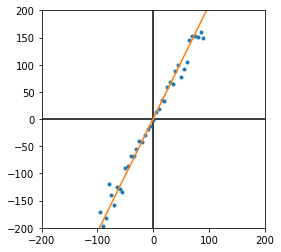

In [ ]:
plt.figure(figsize=(4,4))
input = [x for x in range(-100,100,5)]
target = [ (2+np.random.uniform(-0.5,0.5))*x+np.random.randint(-3,3) for x in input]
plt.plot(input[:], target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_])
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

y=2xx+3x+5

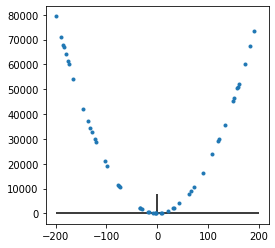

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(input, target,'.')
plt.vlines(0,-200,8000)
plt.hlines(0,-200,200)
plt.show()

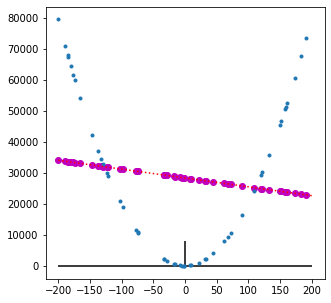

In [ ]:
input_arr = np.array(input).reshape(-1,1)
lr = LinearRegression()
lr.fit(input_arr,target)
p_val = lr.predict(input_arr)
plt.figure(figsize=(5,5))
plt.plot(input, target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_],'r:')
plt.scatter(input,p_val,color='m')
plt.vlines(0,-200,8000)
plt.hlines(0,-200,200)
plt.show()

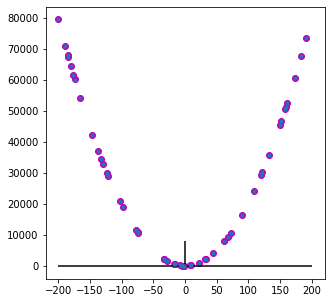

In [ ]:
input_total = [[x,x*x] for x in input]
lr = LinearRegression()
lr.fit(input_total, target)
p_val2 = lr.predict(input_total)
plt.figure(figsize=(5,5))
plt.plot(input, target,'.')
plt.scatter(input,p_val2,color='m')
plt.vlines(0,-200,8000)
plt.hlines(0,-200,200)
plt.show()

In [ ]:
print(type(train_input))
print(train_input.shape)

<class 'numpy.ndarray'>
(42, 1)


In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)
p_val = lr.predict([[2],[10],[50],[100]])
print("예측:",p_val)

예측: [-512.64129559 -238.58980848 1131.66762711 2844.48942159]


In [ ]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()
pl2 = [[x,x*x] for x in perch_length]
lr = LinearRegression()
lr.fit(pl2,perch_weight)

LinearRegression()

In [ ]:
test2 = [[x,x*x] for x in range(0,100)]
p_val2 = lr.predict(test2)

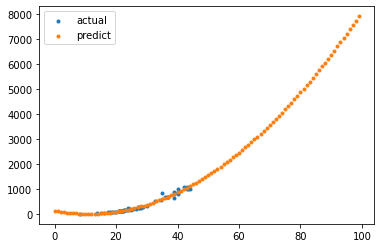

In [ ]:
plt.scatter(perch_length,perch_weight,label='actual',marker='.')
plt.scatter(range(0,100),p_val2,label='predict',marker='.')
plt.legend()
plt.show()

y = -22.41/length+1.02/length*length + 131.645

In [ ]:
print(lr.coef_,lr.intercept_)

[-22.4189282    1.02094922] 131.6453196989612


In [ ]:
perch_full=perch_df[['Length2','Height','Width']].to_numpy()
print(perch_full)

In [ ]:
perch_weight

In [81]:
train_input, test_input, train_target,test_target = \
train_test_split(perch_full,perch_weight)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [84]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [85]:
poly = PolynomialFeatures(degree=3,include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [86]:
print(poly.get_feature_names())

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [121]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[1,2,3]])
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)

(42, 9)
(14, 9)


In [91]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))#good fit

0.9892451913656765
0.9859015256548721


In [92]:
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))#under fit

0.9420856886110769
0.9415553050929889


In [97]:
poly5 = PolynomialFeatures(include_bias=False,degree=5)
poly5.fit([[1,2,3]])
train_poly5 = poly5.transform(train_input)
test_poly5 = poly5.transform(test_input)
print(train_poly5.shape)

(42, 55)


In [98]:
lr = LinearRegression()
lr.fit(train_poly5,train_target)
print(lr.score(train_poly5,train_target))
print(lr.score(test_poly5,test_target))#over fit

0.9999999985009043
-377.8739777761497


In [99]:
from sklearn.preprocessing import StandardScaler

In [105]:
ss = StandardScaler()
ss.fit([[1,2],[1,2],[2,3],[3,4],[3,1]])
print(ss.transform([[1,2],[1,2],[2,3],[3,4],[3,1]]))

[[-1.11803399 -0.39223227]
 [-1.11803399 -0.39223227]
 [ 0.          0.58834841]
 [ 1.11803399  1.56892908]
 [ 1.11803399 -1.37281295]]


In [108]:
a = np.array([2,2,3,4,1])
print(a.mean(),a.std())

2.4 1.019803902718557


In [116]:
print((a-2.4)/1.02)

[-0.39215686 -0.39215686  0.58823529  1.56862745 -1.37254902]


In [117]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [118]:
ir = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.coef_)

[ -199.08116922  -123.37167597   151.29426175   445.2292901
   -75.61094411  -126.87253858  1697.69081919 -2963.28422895
  1556.68073645]


# Ridge 조정방법1

In [123]:
from sklearn.linear_model import Ridge #조정된다 -> good fit
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.coef_)

[-25.91651119 -20.77360215 -27.09012607  79.92200533  81.34752605
  62.51911335  81.7620346   61.90211978  46.92673613]


In [124]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))#good fit

0.9848163413680778
0.9890861598649139


# Lasso 조정방법2 

ridge와 달리 조정(제거)후 다시 score가능



In [125]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.coef_)

[-77.28656278 -12.7293043   -0.         139.70972941 109.21216075
  12.06295118 101.00880947   0.          69.40734976]


In [126]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))#good fit

0.9858534764704255
0.9890258915191664


하이퍼 파라미터 값을 그라디언트하게 전달하면서 적절한 값을 찾아라

In [151]:
train_score=[]
test_score=[]

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))
print(train_score,test_score)

[0.9886637617762807, 0.9877361057900821, 0.9872292158336523, 0.9848163413680778, 0.9747762956637008, 0.92800744234958] [0.9892344679775559, 0.9907237206711212, 0.9911949366623172, 0.9890861598649139, 0.979129635666821, 0.9306027828217588]


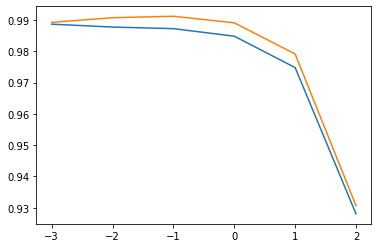

In [152]:
plt.plot(np.log10(alpha_list),train_score,label='train score')
plt.plot(np.log10(alpha_list),test_score,label='test score')
plt.show()

In [153]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9872292158336523
0.9911949366623172


In [164]:
train_score=[]
test_score=[]

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

print(train_score,test_score)

[0.9872292158336523, 0.9872292158336523, 0.9872292158336523, 0.9872292158336523, 0.9872292158336523, 0.9872292158336523] [0.9911949366623172, 0.9911949366623172, 0.9911949366623172, 0.9911949366623172, 0.9911949366623172, 0.9911949366623172]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+04, tolerance: 4.985e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+04, tolerance: 4.985e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


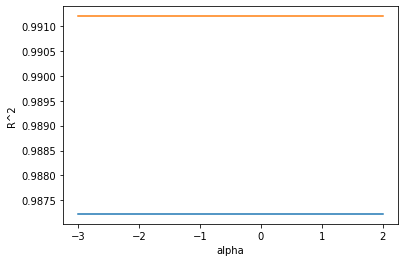

In [165]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [160]:
lasso = Lasso(alpha=1,max_iter=1000000)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9858669276140093
0.9891359042150881


선형 함수

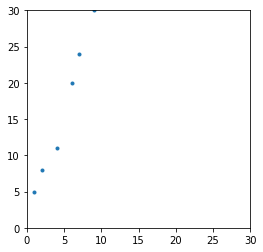

In [166]:
ex = [2,4,7,1,9,6]
ex_ys = [8,11,24,5,30,20]
ex_xs = [[x] for x in ex]
plt.figure(figsize=(4,4))
plt.plot(ex,ex_ys,'.')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

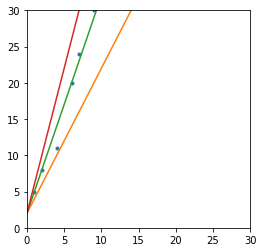

In [168]:
plt.figure(figsize=(4,4))
plt.plot(ex,ex_ys,'.')
plt.plot([0,30],[2*0+2,30*2+2],label='y=2x+2')
plt.plot([0,30],[3*0+2,30*3+2],label='y=3x+2')
plt.plot([0,30],[4*0+2,30*4+2],label='y=4x+2')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [170]:
def mae(yp,y):
  return np.mean(sum(np.abs(yp-y)))
def mse(yp,y):
  return np.mean(sum(yp-y)**2)

In [171]:
yp=np.array([1,2,3])
ya=np.array([2,3,4])
print(mae(yp,ya),mse(yp,ya))

3.0 9.0


In [177]:
ex_arr = np.array(ex)
ey_arr = np.array(ex_ys)
mses=[]
for w in np.arange(-2,5,0.1):
  yp1 = w*ex_arr+2
  mses.append(mse(yp1,ey_arr))
print(mses)
print(np.argmin(mses))
print(mses[50])

[20736.0, 19909.21, 19099.239999999998, 18306.089999999997, 17529.760000000002, 16770.25, 16027.559999999998, 15301.689999999993, 14592.639999999996, 13900.409999999994, 13224.999999999993, 12566.409999999996, 11924.639999999994, 11299.68999999999, 10691.559999999996, 10100.249999999995, 9525.759999999991, 8968.089999999993, 8427.239999999993, 7903.209999999994, 7395.99999999999, 6905.609999999992, 6432.039999999992, 5975.289999999991, 5535.359999999992, 5112.249999999992, 4705.959999999992, 4316.489999999991, 3943.8399999999906, 3588.0099999999907, 3248.999999999991, 2926.8099999999918, 2621.4399999999914, 2332.889999999992, 2061.159999999992, 1806.2499999999927, 1568.1599999999928, 1346.8899999999928, 1142.4399999999935, 954.8099999999938, 783.9999999999942, 630.0099999999952, 492.8399999999951, 372.48999999999523, 268.9599999999962, 182.24999999999721, 112.35999999999754, 59.28999999999794, 23.039999999998813, 3.6099999999995696, 1.0000000000002611, 15.210000000001125, 46.2400000000

In [189]:
plt.plot(np.arange(mses))
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

TypeError: ignored

In [180]:
def gradient(ys,xs,w,b):
  yp = w*xs + b
  error = ys - yp
  wd = -(2/len(xs))*sum(xs*error)
  bd = -(2/len(xs))*sum(error)
  return wd,bd

In [182]:
def gradient_descent(xs,ys,lr=0.001,epochs=1000):
  wphl = [] #학습 과정에서의 가중치와 편향을 보관
  wp = np.random.uniform(-1,1) #초기 과중치를 랜덤하게 설정
  bp = np.random.uniform(-1,1) #초기 편향을 랜덤하게 설정
  for epoch in range(epochs):
    wd,bd = gradient(ys,xs,wp,bp) #가중치와 편향의 기울기를 계산
    wp = wp-(wd*lr)
    bp = bp-(bd*lr)
    wphl.append([wp,bp])
  return wp,bp,wphl #가중치, 편향, 히스토리 반환

In [ ]:
wp, bp,wphl = gradient_descent(ex_arr,ey_arr)
for epoch, (wb,bd) in enumerate(wphl):
  print(f"epoch:{epoch:04d} w:{wb:10.2f} b:{bd:10.2f}" )

In [ ]:
from numpy.ma.core import minimum_fill_value
min_val = min(min(ex_arr),min(ey_arr))
max_val = max(max(ex_arr),max(ey_arr))
for epoch, (wb,bd) in enumerate(wphl):
  plt.figure(figsize=(4,4))
  sx = min_val
  sy = wb*sx+bd
  ex = max_val
  ey = wb*ex+bd
  plt.plot(ex_arr,ey_arr,'.',label='actual')
  plt.plot([sx,ex],[sy,ey],label=f'epoch:{epoch} y = {wb:.2f}x+{bd:.2f}')
  plt.legend()
  plt.show()